In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [19]:
def bmi(weight,height):
    return round((weight/(height**2)*10000),1)

data['BMI'] = bmi(data['Weight'],data['Height'])
weight_status = []
for bmi in data['BMI']:
    if bmi < 18.5:
            weight_status.append('Underweight')
    elif 18.5<=bmi<=24.9:
        weight_status.append('Healthy')
    elif 25.0<=bmi<=29.9:
        weight_status.append('Overweight')
    else:
        weight_status.append('Obese')

# bmi = weight/h^2
# weight = (bmi *h^2)/10000

def target_weight(height):
    target_bmi = 21.7
    target_weight = (target_bmi*(height**2))/10000 #
    return round(target_weight,1)
data['Weight Status'] = weight_status
data.head()

,Gender,Height,Weight,Index,BMI,Weight Status
0,Male,174,96,4,31.7,Obese
1,Male,189,87,2,24.4,Healthy
2,Female,185,110,4,32.1,Obese
3,Female,195,104,3,27.4,Overweight
4,Male,149,61,3,27.5,Overweight


In [22]:
data['Target Weight'] = target_weight(data['Height'])
data.head()

,Gender,Height,Weight,Index,BMI,Weight Status,Target Weight
0,Male,174,96,4,31.7,Obese,65.7
1,Male,189,87,2,24.4,Healthy,77.5
2,Female,185,110,4,32.1,Obese,74.3
3,Female,195,104,3,27.4,Overweight,82.5
4,Male,149,61,3,27.5,Overweight,48.2


In [4]:
def target_weight(height,weight):
    current_bmi = (weight/(height**2) *10000)
    print(current_bmi)
    target_bmi = 18.5 + (24.9-18.5)/2
    print(target_bmi)
    if current_bmi <= 18.5:
        target = weight - target_bmi*height**2/10000
    else:
        target = weight + target_bmi*height**2/10000
    return round(target,1)

target_weight(174,96)

31.708283789139916
21.7


161.7

In [5]:
plt.bar(data['Weight'],)

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
data_male = data.loc[data['Gender']=='Male']
data_female = data.loc[data['Gender']=='Female']
data_male

,Gender,Height,Weight,Index,BMI,Weight Status
0,Male,174,96,4,31.7,Obese
1,Male,189,87,2,24.4,Healthy
4,Male,149,61,3,27.5,Overweight
5,Male,189,104,3,29.1,Overweight
6,Male,147,92,5,42.6,Obese
...,...,...,...,...,...,...
487,Male,187,80,2,22.9,Healthy
488,Male,198,136,4,34.7,Obese
494,Male,152,98,5,42.4,Obese
498,Male,150,95,5,42.2,Obese


In [ ]:
weight_group = data.groupby(['Gender','Weight Status']).size()
weight_group.first()

TypeError: first() missing 1 required positional argument: 'offset'

In [ ]:
labels = ['Obese','Overweight','Healthy','Underweight']
obese = data.loc[(data['Weight Status'].isin(['Obese']))]
healthy = data.loc[(data['Weight Status'].isin(['Healthy']))]
overweight = data.loc[(data['Weight Status'].isin(['Overweight']))]
underweight = data.loc[(data['Weight Status'].isin(['Underweight']))]
print(len(obese['Gender']),
    len(healthy['Gender']),
    len(underweight['Gender']),
    len(overweight['Gender'])
)

332 64 34 70


In [ ]:
# maximum and minimums
max_height = np.max(data['Height'])
max_height_m = np.max(data_male['Height'])
max_height_f = np.max(data_female['Height'])
max_weight = np.max(data['Weight'])
max_weight_m = np.max(data_male['Weight'])
max_weight_f = np.max(data_female['Weight'])
print(f"The max height is {max_height}\nThe max height for males is {max_height_m} and for females is {max_height_f}\n The max weight is {max_weight}\n The max weight for males is {max_weight_m} and for females is {max_weight_f}")

The max height is 199
The max height for males is 199 and for females is 199
 The max weight is 160
 The max weight for males is 160 and for females is 160


In [ ]:
weight_mean = np.mean(data['Weight'])
weight_mean_m = np.mean(data_male['Weight'])
weight_mean_f = np.mean(data_female['Weight'])
print(f"Mean weight: {weight_mean}\nMean weight in males: {weight_mean_m}\nMean weight in females: {weight_mean_f}")

Mean weight: 106.0
Mean weight in males: 106.31428571428572
Mean weight in females: 105.69803921568628


In [ ]:
height_mean = np.mean(data['Height'])
height_mean_m = np.mean(data_male['Height'])
height_mean_f = np.mean(data_female['Height'])
print(f"Mean height: {height_mean}\nMean height in males: {height_mean_m}\nMean height in females: {height_mean_f}")

Mean height: 169.944
Mean height in males: 169.64897959183673
Mean height in females: 170.22745098039215


In [ ]:
def variation(array):
    mean = array.sum()/len(array)
    def summation(mean,array):
        if array.size < 2:
            return (array.sum()-mean)**2
        else:
            total_summation = summation(mean,array[0:-1]) + summation(mean,array[-1])
            return total_summation
    
    return summation(mean,array)/len(array)

def std(array):
    std = np.sqrt(variation(array))
    return std

height = np.array(data['Height'])
height_m = np.array(data_male['Height'])
height_f = np.array(data_female['Height'])
weight = np.array(data['Weight'])
weight_m = np.array(data_male['Weight'])
weight_f = np.array(data_female['Weight'])
height_var = {'Height variation':variation(height),'Male height variation':variation(height_m),'Female height variation':variation(height_f)}
weight_var = {'Weight variation':variation(weight),'Male weight variation':variation(weight_m),'Female weight variation':variation(weight_f)}

In [ ]:
height_var

{'Height variation': 267.6128640000003,
 'Male height variation': 290.04821324448125,
 'Female height variation': 245.89336409073428}

In [ ]:
weight_var

{'Weight variation': 1046.536,
 'Male weight variation': 1009.1869387755103,
 'Female weight variation': 1082.2343098808155}

In [ ]:
height_std = {'Height std':std(height),'Male height std':std(height_m),'Female height std':std(height_f)}
weight_std = {'Weight std':std(weight),'Male weight std':std(weight_m),'Female weight std':std(weight_f)}

In [ ]:
height_std

{'Height std': 16.35887722308595,
 'Male height std': 17.03080189669533,
 'Female height std': 15.680987344256556}

In [ ]:
weight_std

{'Weight std': 32.350208654659404,
 'Male weight std': 31.767702762011456,
 'Female weight std': 32.89732982904259}

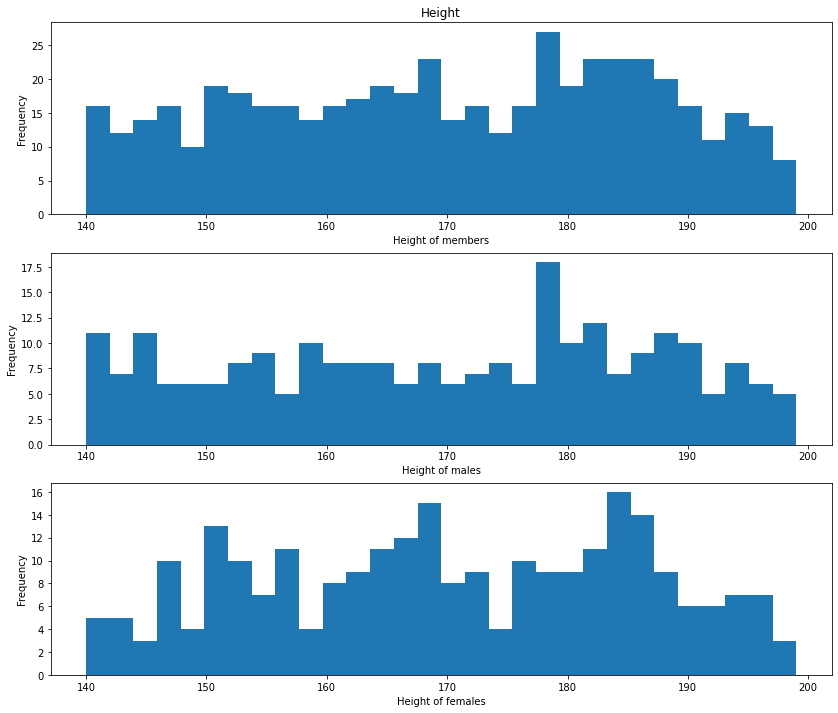

In [ ]:
plt.figure(figsize=((14,12)))
plt.subplot(3,1,1)
plt.hist(height,bins=30,histtype='bar')
plt.title('Height')
plt.xlabel('Height of members')
plt.ylabel('Frequency')

plt.subplot(3,1,2)
plt.hist(height_m,bins=30,histtype='bar')
plt.xlabel('Height of males')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
plt.hist(height_f,bins=30,histtype='bar')
plt.xlabel('Height of females')
plt.ylabel('Frequency')

plt.show()

In [ ]:
def std_percentages(x, x_mean, x_std):

    """ Computes the percentage of coverage at 1std, 2std and 3std from the
    mean value of a certain variable x.
    
    Arguments
    ---------
    x      : array, data we want to compute on. 
    x_mean : float, mean value of x array.
    x_std  : float, standard deviation of x array.
    
    Returns
    -------
    
    per_std_1 : float, percentage of values within 1 standard deviation.
    per_std_2 : float, percentage of values within 2 standard deviations.
    per_std_3 : float, percentage of values within 3 standard deviations.    
    """
    
    std_1 = x_std
    std_2 = 2 * x_std
    std_3 = 3 * x_std
    
    elem_std_1 = np.logical_and((x_mean - std_1) < x, x < (x_mean + std_1)).sum()
    per_std_1 = elem_std_1 * 100 / len(x) 
    
    elem_std_2 = np.logical_and((x_mean - std_2) < x, x < (x_mean + std_2)).sum()
    per_std_2 = elem_std_2 * 100 / len(x) 
    
    elem_std_3 = np.logical_and((x_mean - std_3) < x, x < (x_mean + std_3)).sum()
    per_std_3 = elem_std_3 * 100 / len(x) 
    
    return per_std_1, per_std_2, per_std_3

height_std1_per,height_std2_per,height_std3_per = std_percentages(height, height_mean, height_std['Height std'])
male_height_std1_per,male_height_std2_per,male_height_std3_per = std_percentages(height_m, height_mean_m, height_std['Male height std'])
female_height_std1_per,female_height_std2_per,female_height_std3_per = std_percentages(height_f, height_mean_f, height_std['Female height std'])

In [ ]:
print(f"The percentage of coverage at 1 std of the abv_mean is {height_std1_per}\nThe percentage of coverage at 2 std of the abv_mean is {height_std2_per}\nThe percentage of coverage at 3 std of the abv_mean is {height_std3_per}")
print(f"The percentage of coverage at 1 std of the abv_mean for males is {male_height_std1_per}\nThe percentage of coverage at 2 std of the abv_mean for males is {male_height_std2_per}\nThe percentage of coverage at 3 std of the abv_mean for males is {male_height_std3_per}")
print(f"The percentage of coverage at 1 std of the abv_mean for females is {female_height_std1_per}\nThe percentage of coverage at 2 std of the abv_mean for females is {female_height_std2_per}\nThe percentage of coverage at 3 std of the abv_mean for females is {female_height_std3_per}")

The percentage of coverage at 1 std of the abv_mean is 59.6
The percentage of coverage at 2 std of the abv_mean is 100.0
The percentage of coverage at 3 std of the abv_mean is 100.0
The percentage of coverage at 1 std of the abv_mean for males is 57.55102040816327
The percentage of coverage at 2 std of the abv_mean for males is 100.0
The percentage of coverage at 3 std of the abv_mean for males is 100.0
The percentage of coverage at 1 std of the abv_mean for females is 58.8235294117647
The percentage of coverage at 2 std of the abv_mean for females is 100.0
The percentage of coverage at 3 std of the abv_mean for females is 100.0
